<a href="https://colab.research.google.com/github/mahimabhasin/EDA_US_CAR/blob/master/EDA_US_CARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EXPLORATORY DATA ANALYSIS***
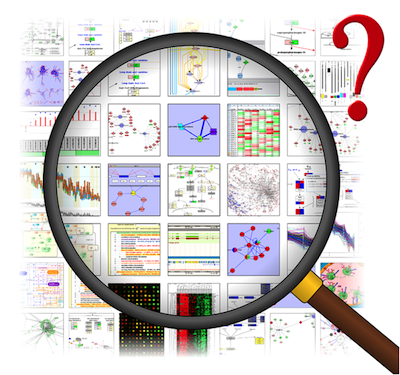

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:

– main features of data

– variables and relationships that hold between them

– identifying which variables are important for our problem

EDA – plays a critical role in understanding the what, why, and how of the problem statement. It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

In this project, we're going to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.

Various steps which are to be performed are:
1. Importing the dataset and the necessary libraries, checking datatype, statistical summary,
shape, null values etc.
2. Dropping the columns in the dataset which are of less relevance.
3. Renaming the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"
4. Checking for any duplicates in the data, check for null values and missing data and removing
them.
5. Ploting graphs of various columns to check for outliers and removing those data points from the
dataset.
6. What car brands are the most represented in the dataset and finding the average price among
the top car brands.
7. Ploting the correlation matrix and documenting the insights.
8. Performing EDA and ploting different graphs and documenting the findings.
9. Splitting the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable
10. Trying different algorithms and check their performance over metrics like R
square, RMSE, MAE etc and documenting the findings.


# 1.1 Importing all the required Libraries

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1.2 Importing the dataset
One can get the dataset from https://www.kaggle.com/CooperUnion/cardataset

In [ ]:
# Importing data
data = pd.read_csv('data.csv')
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


At times, while using describe(), the output may not get all the rows and columns when using with print so to print all the rows and columns, we're fremoving default display limit.

In [ ]:
# Removing the default display limits for Pandas data frames:
pd.set_option('display.max_columns', None) #This will not limit the number of columns to be displayed in the output


# 1.3 Checking the statistical summary and datatypes.

In [ ]:
#Identifying the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
#Getting to know the data types of each variable
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
#Statistical Summary
#print(data.mean()) In this way single single statistical summary can be obtained
# in order to get all the statistical measures in a single go, we'll use describe()
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Getting the number of instances and features
data.shape

(11914, 16)

# 2. Dropping the columns which are of less relevance.
I will remove some features such as Number of Doors, Market Category and Year from this dataset. Because these features do not contribute to the prediction of price.

In [ ]:
#Dropping not required columns
data = data.drop(['Number of Doors', 'Market Category'], axis=1)
data.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 3. Remaning the columns.
The names of columns should be descriptive and readable so we can change their names. Here I'm renaming the columns since the names of columns in this data to some short forms.

In [ ]:
print(data.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP'],
      dtype='object')


In [ ]:
#Renaming column names
new_data = data.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", 
                                  "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode",
                                  "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"}) 
  
# changing columns using .columns() 
data.columns = ['Make','Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
               'Transmission', 'Drive Mode', 'Vehicle Size', 'Vehicle Style',
                'MPG-H', 'MPG-C', 'Popularity', 'Price'] 
data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 4. Checking for duplicates and Null.
There might be the data in the dataset which has been recorded more than once, this type of data only increases the size of data but is of no use since it's one entry has already been used. Thus removing the duplicates and treating the null values.

In [ ]:
# Getting the shape of the data
data.shape

(11914, 14)

In [ ]:
# Getting the number of duplicate entries
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (721, 14)


In [ ]:
# dropping duplicate rows
data = data.drop_duplicates()
data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 4.1 Treating Null Values
Here, first I'm trying to find out the columns with null values. Once I get the columns with null values, I'm going to fill the null values accordingly. 
I've cleared the null values by filling forward method.

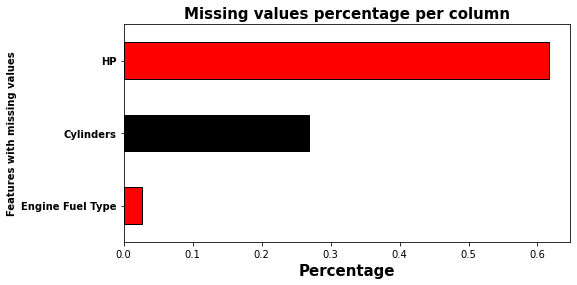

In [ ]:
nuls = (data.isnull().sum() / len(data))*100
nuls = nuls.drop(nuls[nuls == 0].index).sort_values()
plt.figure(figsize=(8, 4))
nuls.plot.barh(color=('red', 'black'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [ ]:
# Getting the type of data in the columns with null values
NA=data[['Engine Fuel Type','HP', 'Cylinders']]
NAct=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(NAct.shape[1],'categorical features with missing values')
print(NAnum.shape[1],'numerical features with missing values')

1 categorical features with missing values
2 numerical features with missing values


In [ ]:
NAnum.head()

,HP,Cylinders
0,335.0,6.0
1,300.0,6.0
2,300.0,6.0
3,230.0,6.0
4,230.0,6.0


In [ ]:
# Using Forward fill method
data['HP']=data['HP'].fillna(method='ffill')
data['Cylinders']=data['Cylinders'].fillna(method='ffill')

In [ ]:
NAct.head()

,Engine Fuel Type
0,premium unleaded (required)
1,premium unleaded (required)
2,premium unleaded (required)
3,premium unleaded (required)
4,premium unleaded (required)


In [ ]:
# Using forward fill method
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(method='ffill')

In [ ]:
print(data.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


# 5.1. Detecting Outliers.
For this, I'm plotting various boxplots for different columns.

Text(0.5, 1.0, 'Boxplot for Price')

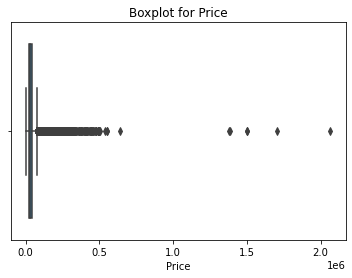

In [ ]:
# Boxplot for price
sns.boxplot(x=data['Price'])
plt.title("Boxplot for Price")

Text(0.5, 1.0, 'Boxplot for HP')

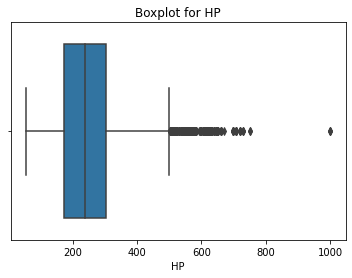

In [ ]:
#Boxplot for HP
sns.boxplot(x=data['HP'])
plt.title("Boxplot for HP")

Text(0.5, 1.0, 'Boxplot for engine cylinders')

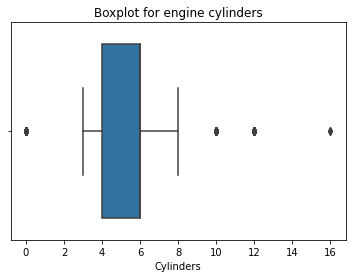

In [ ]:
#Boxplot for engine cylinders
sns.boxplot(x=data['Cylinders'])
plt.title("Boxplot for engine cylinders")

# 5.1 Removing Ouliers


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              132.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21440.0
dtype: float64


In [ ]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8641, 14)

**Checking if Outliers are removed.**

Text(0.5, 1.0, 'Boxplot for Price')

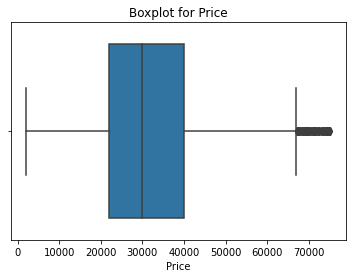

In [ ]:
# Boxplot for price
sns.boxplot(x=data['Price'])
plt.title("Boxplot for Price")

Text(0.5, 1.0, 'Boxplot for HP')

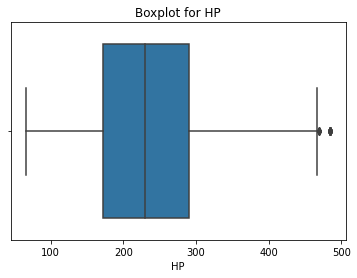

In [ ]:
#Boxplot for HP
sns.boxplot(x=data['HP'])
plt.title("Boxplot for HP")

Text(0.5, 1.0, 'Boxplot for engine cylinders')

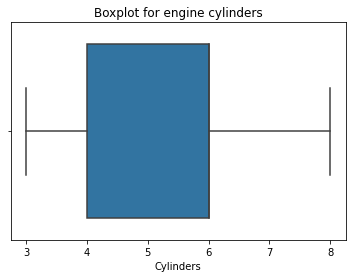

In [ ]:
#Boxplot for engine cylinders
sns.boxplot(x=data['Cylinders'])
plt.title("Boxplot for engine cylinders")

# 6. Getting Top 10 Car Brands


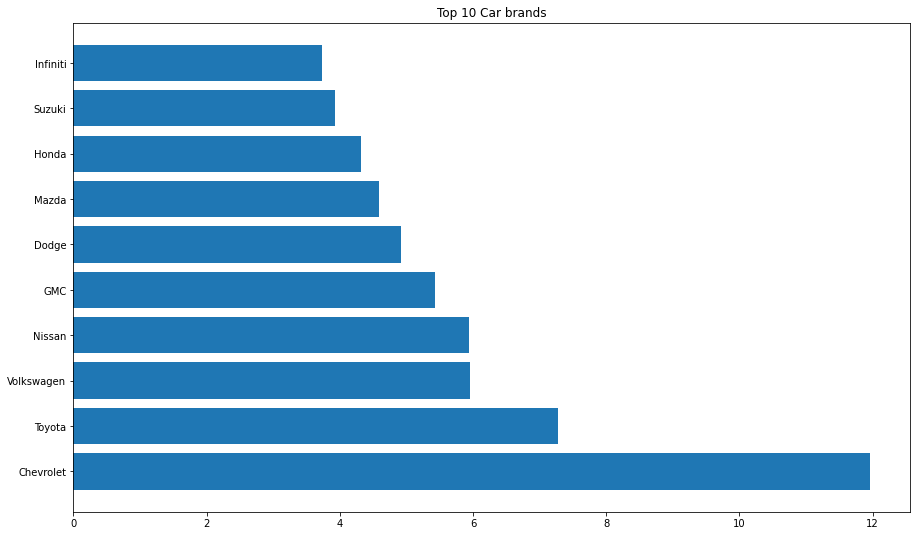

In [ ]:
# # Percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(15,9))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

**Average price among top car brands.**

In [ ]:
prices = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet') |
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28252.488395
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


Conclusion: Thus highest price is of Chevrolet.

Now finding the features which were altered during the years in Chevrolet.

In [ ]:
Chev=data[data['Make'].str.contains('Chevrolet')]
ch=Chev.sort_values(by=['Price'],ascending=False).nlargest(5, 'Price')
chevmodel= ch.style.background_gradient(cmap='Greens')
chevmodel

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
3027,Chevrolet,Corvette,2017,premium unleaded (recommended),460.000000,8.000000,MANUAL,rear wheel drive,Compact,Coupe,25,16,1385,75195
3006,Chevrolet,Corvette,2017,premium unleaded (recommended),460.000000,8.000000,MANUAL,rear wheel drive,Compact,Convertible,25,16,1385,74195
2995,Chevrolet,Corvette,2016,premium unleaded (recommended),460.000000,8.000000,MANUAL,rear wheel drive,Compact,Convertible,29,17,1385,74145
3024,Chevrolet,Corvette,2017,premium unleaded (recommended),460.000000,8.000000,MANUAL,rear wheel drive,Compact,Convertible,25,16,1385,73905
2975,Chevrolet,Corvette,2015,premium unleaded (recommended),460.000000,8.000000,MANUAL,rear wheel drive,Compact,Convertible,29,17,1385,73450



Conclusions:
*   The Chevrolet models of year 2015 and 2016 have same features but the price has increased over the year.
*   The chevrolet models of all 3 years have the same features except for the Vehicle Style: Coupe Corvette are worth more than Convertible Corvette.



**Relation Between vehicle type and Price**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

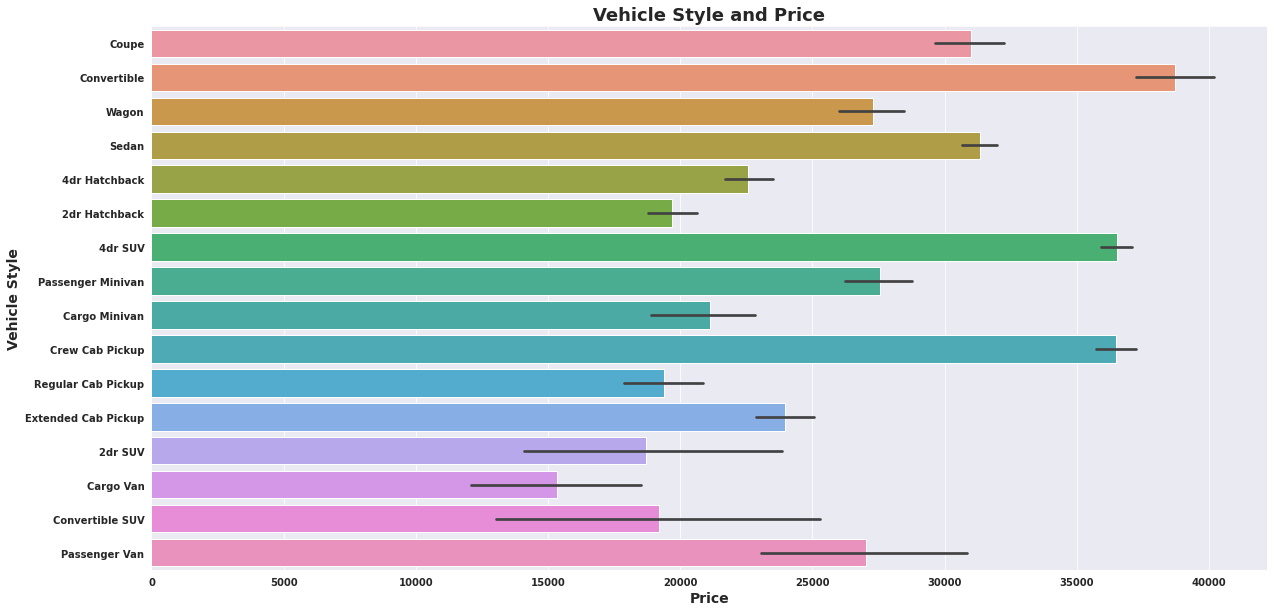

In [ ]:
sns.set({'figure.figsize':(20,10)})
VS=sns.barplot(x=data['Price'], y=data['Vehicle Style'])
plt.title('Vehicle Style and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Vehicle Style', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

Conclusion: Convertible, Crew Can Pickup, 4dr SUV, SEdan, Couple falls amongst the category of the expensive vehicle style.

**Which Vehicle type cars were sold the most?**

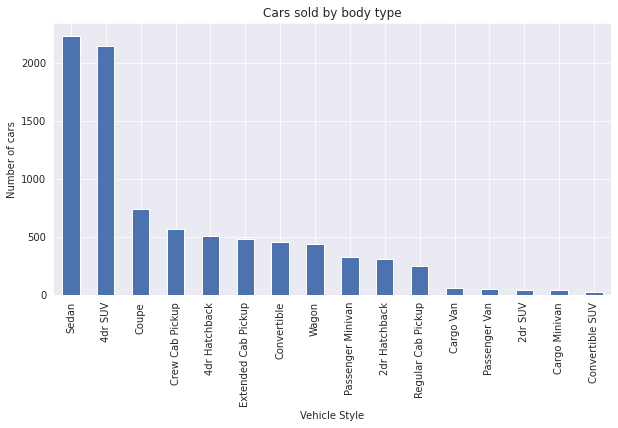

In [ ]:
data['Vehicle Style'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Cars sold by body type")
plt.ylabel('Number of cars')
plt.xlabel('Vehicle Style');

Inference: Sedan vehicle style was the most sold one.

Text(0, 0.5, 'Vehicle Type')

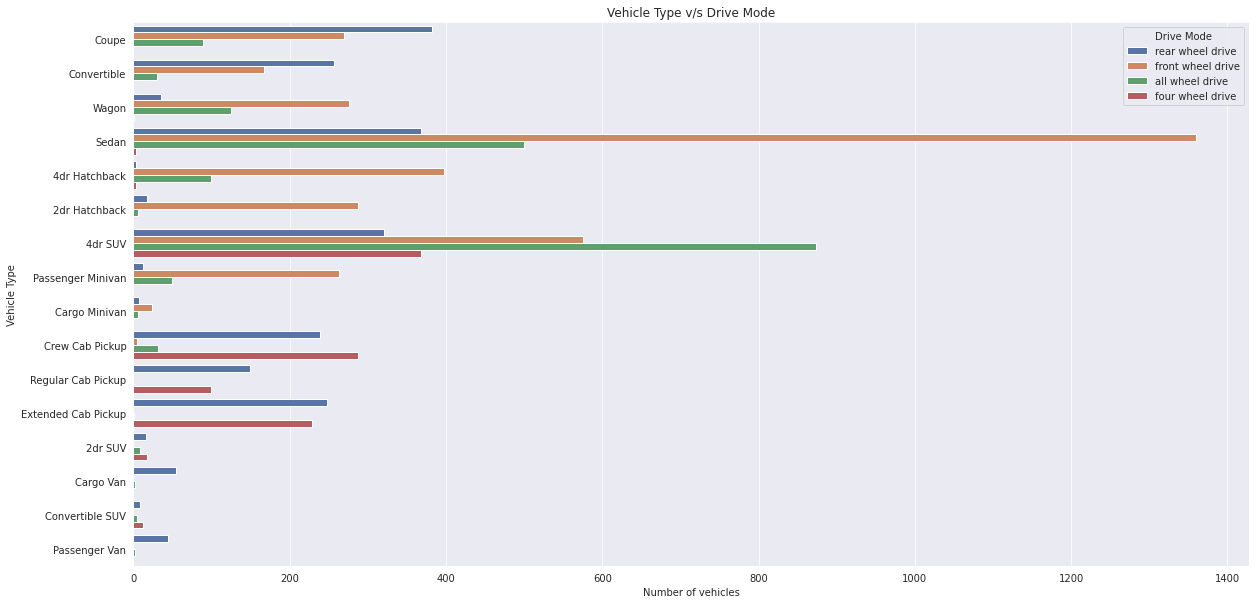

In [ ]:
#Vehicle Style and Drive Type analysis
sns.countplot(y='Vehicle Style', data= data, hue= 'Drive Mode')
plt.title("Vehicle Type v/s Drive Mode")
plt.xlabel("Number of vehicles")
plt.ylabel("Vehicle Type")

# 7. Correlation

In [ ]:
data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330733,-0.094511,0.359710,0.323573,0.204511,0.592328
HP,0.330733,1.000000,0.740119,-0.464468,-0.562273,0.105390,0.743136
Cylinders,-0.094511,0.740119,1.000000,-0.698042,-0.751012,0.024813,0.391501
MPG-H,0.359710,-0.464468,-0.698042,1.000000,0.937950,0.081968,-0.127234
MPG-C,0.323573,-0.562273,-0.751012,0.937950,1.000000,0.071769,-0.201798
Popularity,0.204511,0.105390,0.024813,0.081968,0.071769,1.000000,0.115812
Price,0.592328,0.743136,0.391501,-0.127234,-0.201798,0.115812,1.000000


**Heat Map**

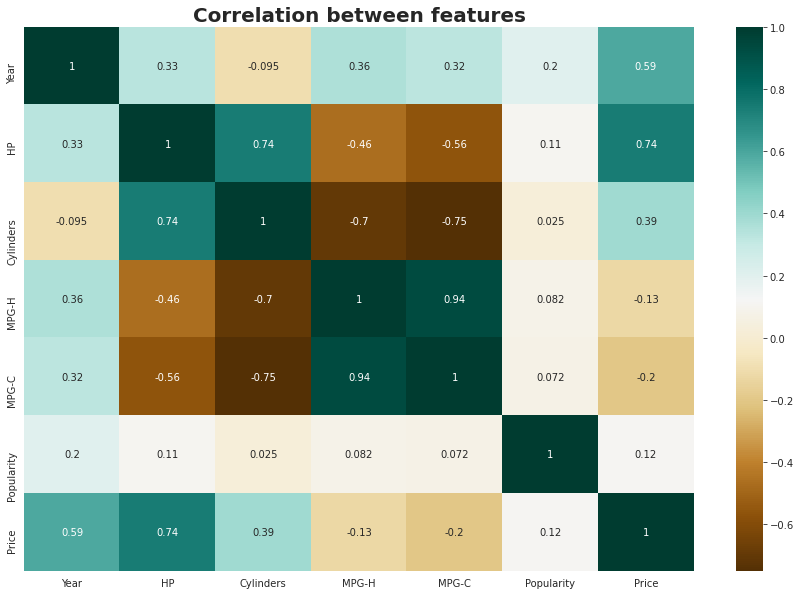

In [ ]:
car_corr=data.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(car_corr, cmap='BrBG',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=20)
plt.show()

Inferences:

There is a +ve correlation between:

*  HP and Cylinders
*  HP and Price
*  MPG-H and MPG-C

There is Strong -ve correlation between :
*  MPG-H and Cylinders
*  MPG-C and Cylinders


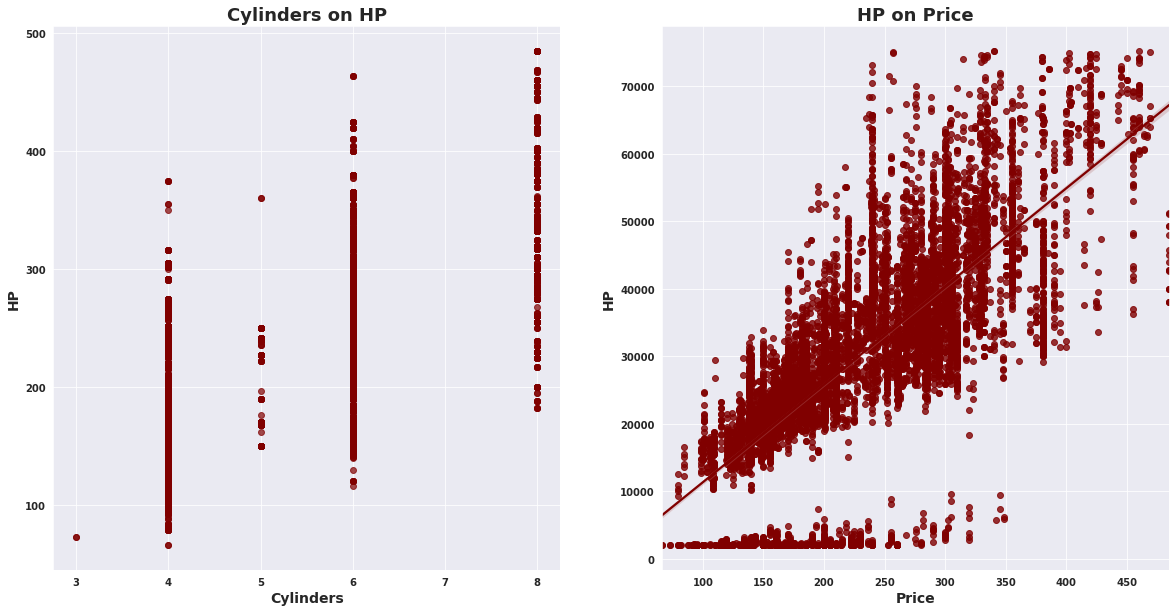

In [ ]:
#Plotting scatter plots in orer to get a more clear view over the conclusions
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=data['Cylinders'], y=data['HP'], color='maroon', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=data['HP'], y=data['Price'], color='maroon')
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

An engine with more cylinders produces more power, and more power means a high Price.

(array([10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 8 Text major ticklabel objects>)

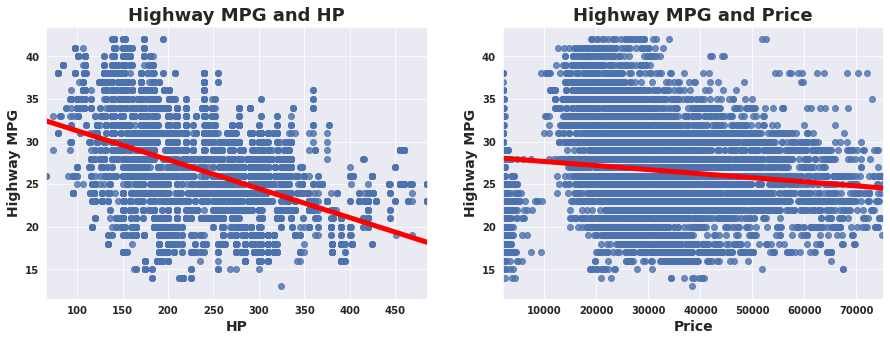

In [ ]:
plt.figure(figsize=(15,5))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=data["HP"], y=data["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Highway MPG and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('Highway MPG', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=data["Price"], y=data["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('Highway MPG and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Highway MPG', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')



From both the heatmap and the plots above, we can see a negative correlation between MPG-H and MPG-C ( how far the car is able to travel for every gallon of fuel it uses in the highway and around the city) and the HP.

Horsepower is a measure of work that can be performed over a given time by an engine. The more power you have the higher the speed you can do it at during a period of time. Generally, higher horsepower comes from burning more fuel, so get lower mpg, more horsepower means less fuel economy.

Basically, race cars and sports cars such as Corvette Have a High Engine Horsepower and a low mpg since they can speed and thus burn more fuel.

Cars like FIAT have a lower Engine Horsepower but a higher mpg since the speed is limited and considered to be more fuel economy.

# 8. Plotting Graphs

**How the price altered over the years?**

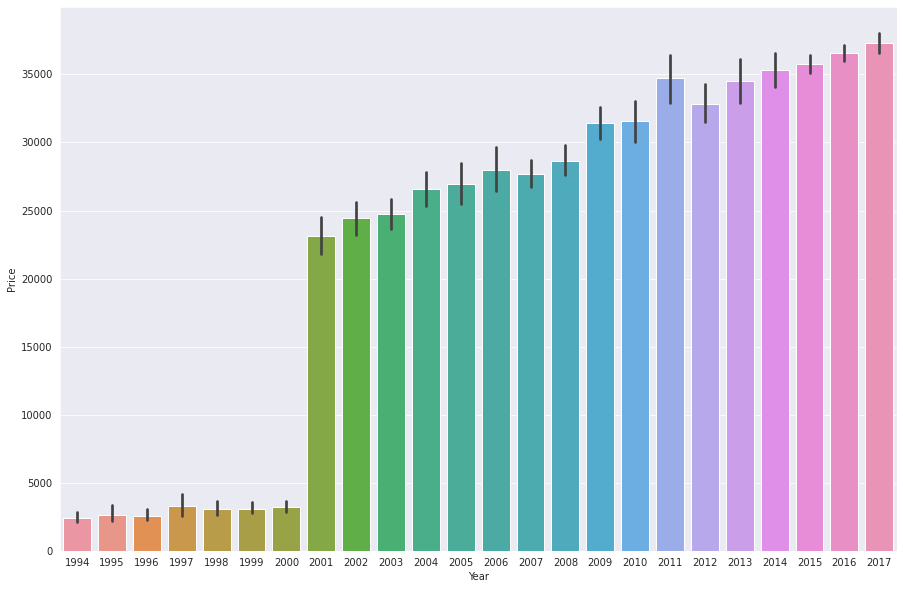

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data['Year'],data['Price'])

**How engine cylinders affect price?**

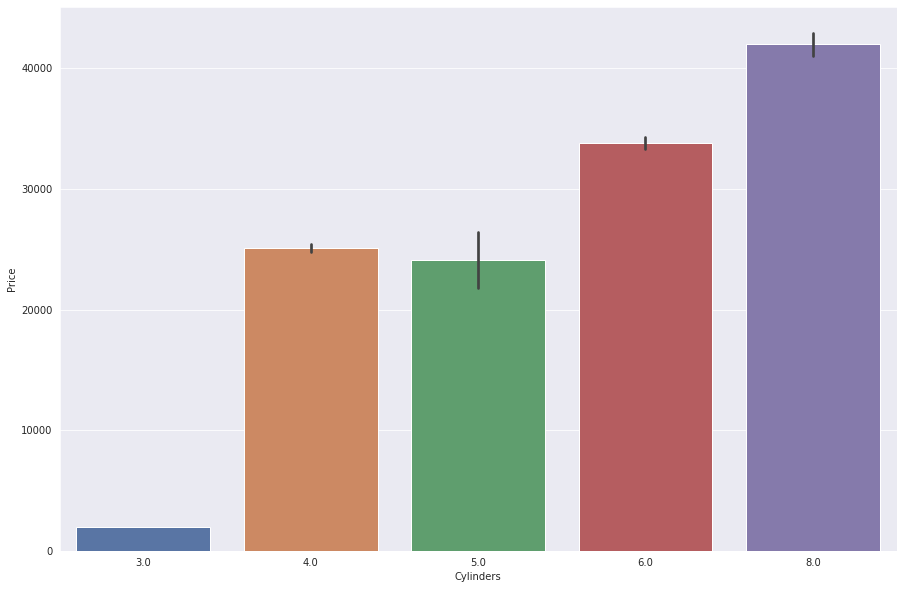

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data['Cylinders'],data['Price'])

**Effect of MPG-H on Price**

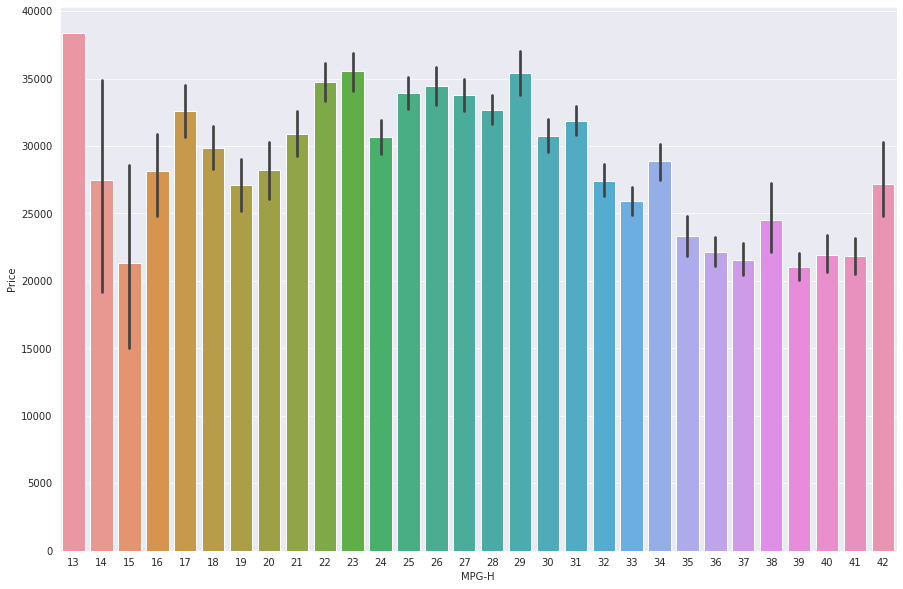

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-H'],data['Price'])

**Effect of MPG-C on Price**

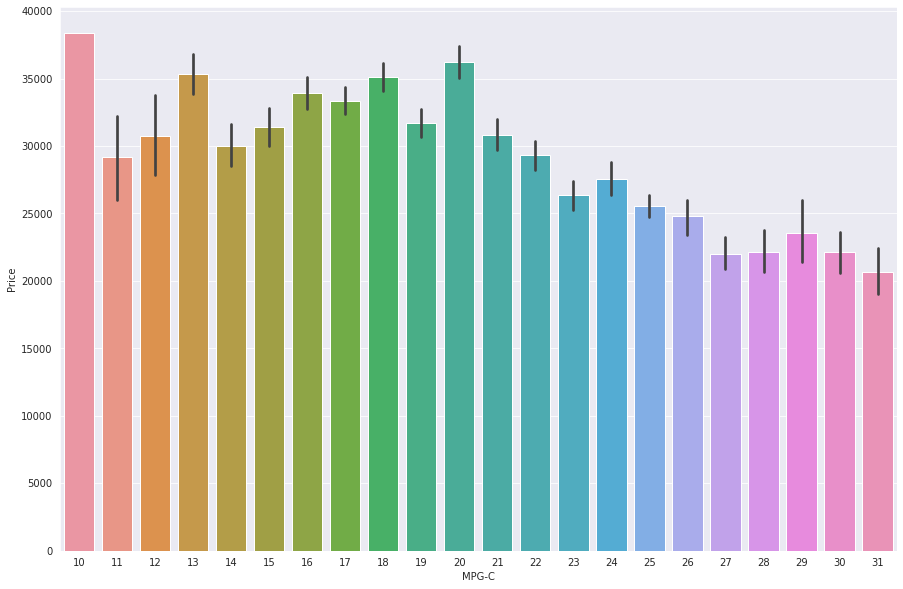

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-C'],data['Price'])

**Conclusions drawn from graphs**

*   Car price increased after year 2000
*   More the no the cylinders, more is the price
*   For MPG-H 13, price is maximum and for MPG-H 15, price is lowest.
*   For MPG-C 10, price is maximum and for MPG-C 31, price is minimum





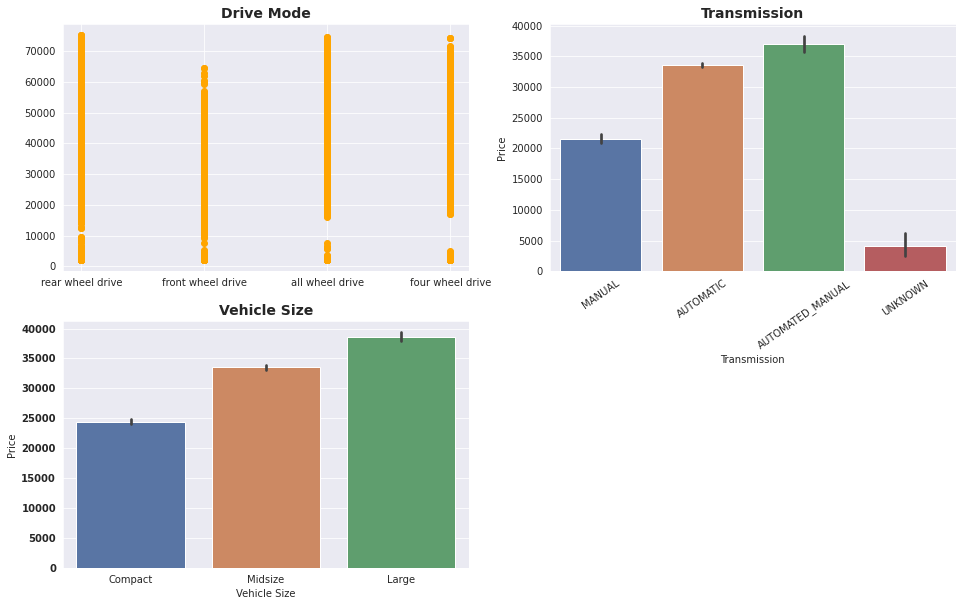

In [ ]:
fig= plt.figure(figsize=(16,10))

ax1 = plt.subplot2grid((2,2), (0, 0))
plt.scatter(x=data['Drive Mode'], y=data['Price'], color='Orange')
plt.title('Drive Mode', weight='bold', fontsize=14)


ax1 = plt.subplot2grid((2,2), (0, 1))
sns.barplot(x=data['Transmission'], y=data['Price'])
plt.xticks(rotation=35)
plt.title('Transmission', weight='bold', fontsize=14)

ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=data['Vehicle Size'], y=data['Price'])
plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)


plt.show()

**Factors contributing to high price**

*   Driven Wheels : Each and every type has same effect
*   Transmission Type: Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)
*   Vehicle Size: Large

# 9. Preparing the data for model.

**Pre Processing Data**

In [ ]:
# For Label Encoder data types need to be cat 
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style']
data[columns_to_convert] = data[columns_to_convert].astype('category')

Encoding using label encoder

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style']: data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,7,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,7,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,7,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,7,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,7,230.0,6.0,2,3,0,6,28,18,3916,34500


In [ ]:
X = data[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y= data['Price'].values

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scy= StandardScaler()
X = scX.fit_transform(X)
y = scy.fit_transform(y.reshape(-1,1))

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6912, 6) (6912, 1)
(1729, 6) (1729, 1)


# 10. Using Various Algorithms

**Multiple Linear Regression**

In [ ]:
# Fitting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(linear.intercept_)
#For retrieving the slope:
print(linear.coef_)

[0.00365016]
[[-0.0290224   0.3545521   0.69903657 -0.06987978  0.0008616   0.02477412]]


In [ ]:
# Prediction
y_test_predict = linear.predict(X_test)
print(y_test_predict)
y_train_predict= linear.predict(X_train)
print(y_train_predict)


[[-0.01835919]
 [ 1.36483609]
 [-0.13126298]
 ...
 [-0.15605373]
 [-0.30613274]
 [ 0.80320275]]
[[ 0.09323673]
 [ 0.24543723]
 [ 0.6873394 ]
 ...
 [-1.13081011]
 [ 0.02411897]
 [ 0.85839782]]


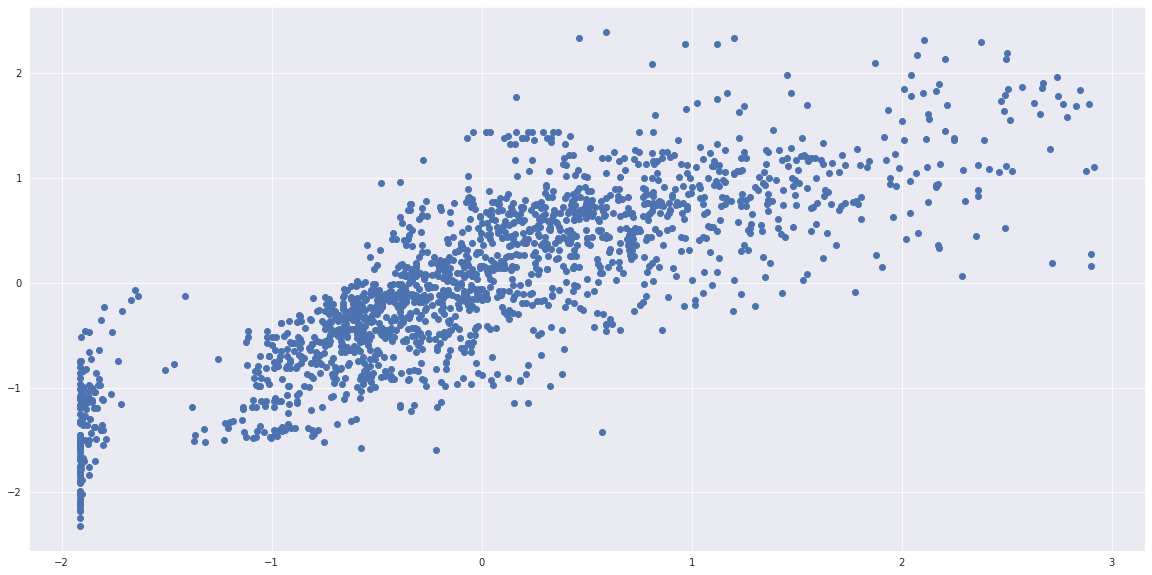

In [ ]:
plt.scatter(y_test, y_test_predict)

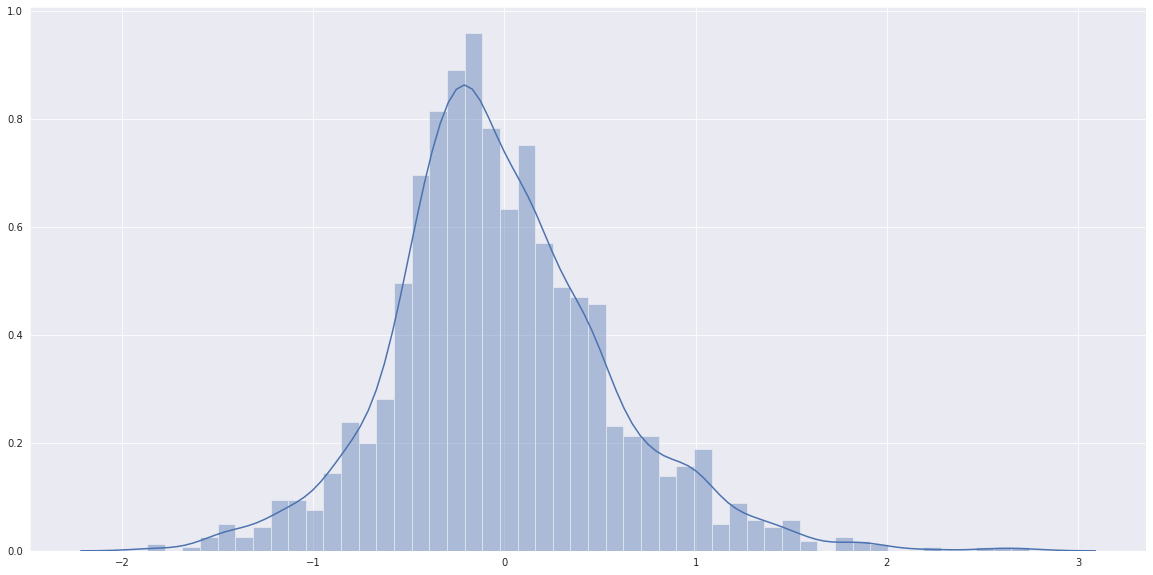

In [ ]:
sns.distplot((y_test-y_test_predict), bins=50)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("MSE for train:", metrics.mean_squared_error(y_train,y_train_predict))
print("MSE for test: ", metrics.mean_squared_error(y_test,y_test_predict))

print("R2 score for train:", metrics.r2_score(y_train,y_train_predict))
print("R2 score for test:", metrics.r2_score(y_test,y_test_predict))

print("Mean Absolute Error for train:", metrics.mean_absolute_error(y_train,y_train_predict))
print("Mean absolute error for test:",metrics.mean_absolute_error(y_test,y_test_predict))

from sklearn import metrics
print("MSE for train:",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))
print("MSE for test:",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))

MSE for train: 0.3064105483331702
MSE for test:  0.32338538623660806
R2 score for train: 0.6950583270638427
R2 score for test: 0.6702602533062093
Mean Absolute Error for train: 0.42526846669464424
Mean absolute error for test: 0.43351143384091095
MSE for train: 0.5535436282111558
MSE for test: 0.5686698393941849


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#data
New_data= data.copy()
var = ['Price','HP','Year','Cylinders','Transmission','Engine Fuel Type','MPG-C','Make','MPG-H','Drive Mode']
data_for_decision_tree = New_data[var]
data_for_decision_tree.head()

,Price,HP,Year,Cylinders,Transmission,Engine Fuel Type,MPG-C,Make,MPG-H,Drive Mode
0,46135,335.0,2011,6.0,2,7,19,3,26,3
1,40650,300.0,2011,6.0,2,7,19,3,28,3
2,36350,300.0,2011,6.0,2,7,20,3,28,3
3,29450,230.0,2011,6.0,2,7,18,3,28,3
4,34500,230.0,2011,6.0,2,7,18,3,28,3


In [ ]:
# dcoupling

data =data_for_decision_tree
target = "Price"

X = data[data.columns.difference([target])]
y = data['Price']

In [ ]:
#Train test spilt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124421)

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# predicting a new value 

# test the output by changing values
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)
# print the predicted price 
print('Value for max depth 4 =',y_pred1) 
print('Value for max depth 5 =',y_pred2) 
print('mean_squared_error max depth 4 =',metrics.mean_squared_error(y_test,y_pred1))
print('r2_score max depth 4 =',metrics.r2_score(y_test,y_pred1))
print('mean_squared_error sqrt max depth 4 =', np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('mean_squared_error for max depth 5 =', np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print('r2_score max depth 5 =',metrics.r2_score(y_test,y_pred2))
print('mean_squared_error sqrt max depth 5 =', np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Value for max depth 4 = [16653.11325967 16653.11325967 32674.79516129 ... 36887.21670886
 22000.9205807  36887.21670886]
Value for max depth 5 = [15931.15413534 15931.15413534 31095.28691983 ... 33377.79354839
 21405.71104816 39153.71916667]
mean_squared_error max depth 4 = 48130448.283251144
r2_score max depth 4 = 0.7845374362037708
mean_squared_error sqrt max depth 4 = 6937.611136641426
mean_squared_error for max depth 5 = 6639.83251959931
r2_score max depth 5 = 0.80263680520813
mean_squared_error sqrt max depth 5 = 6639.83251959931


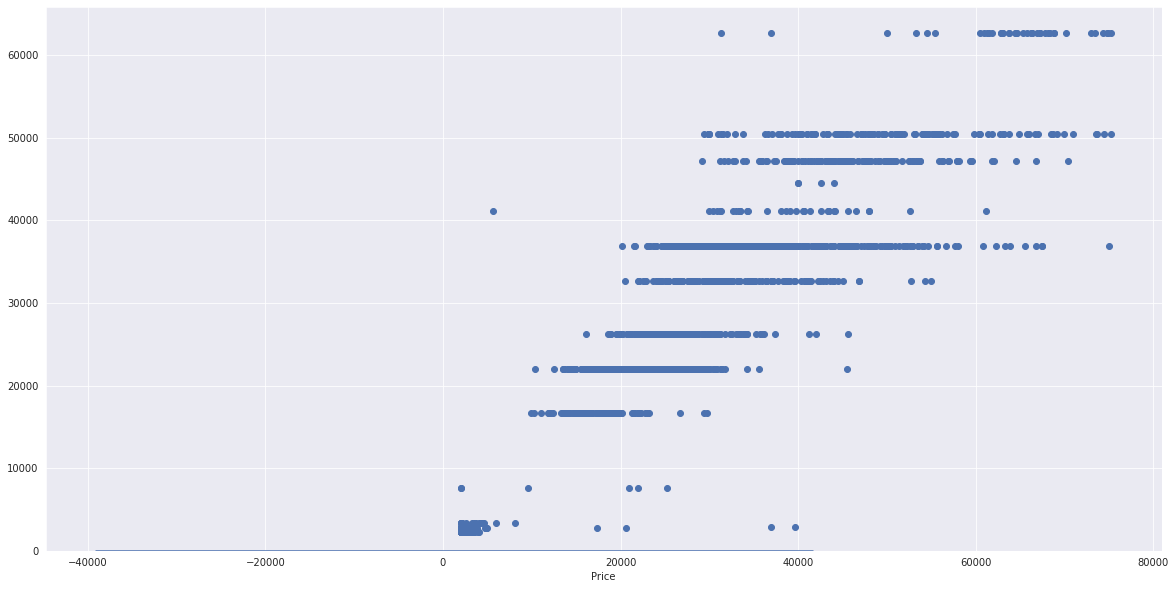

In [ ]:
plt.scatter(y_test, y_pred1)


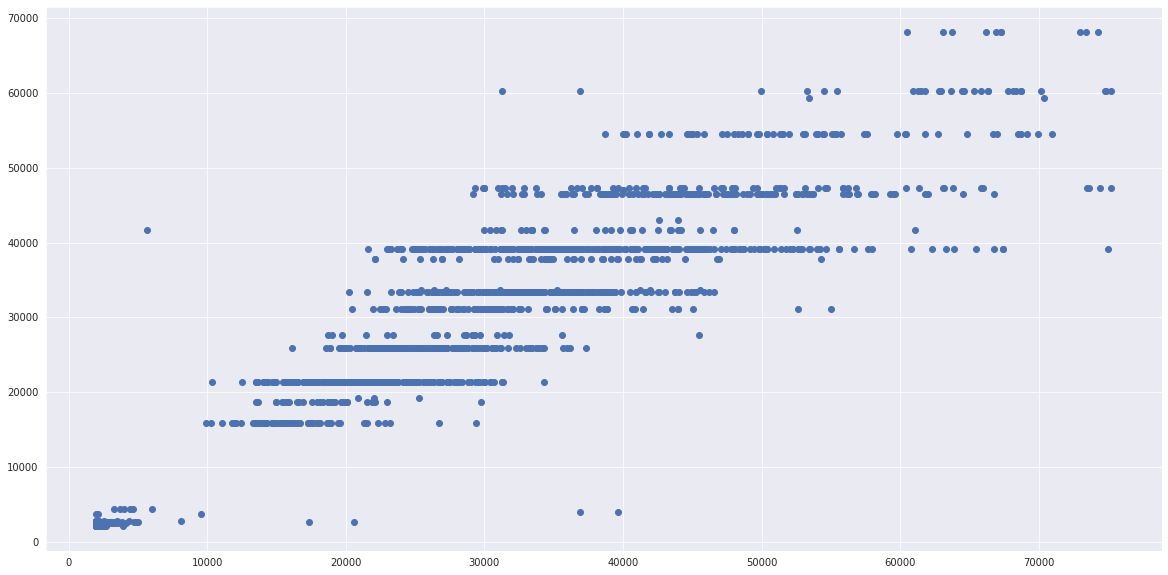

In [ ]:
plt.scatter(y_test, y_pred2)

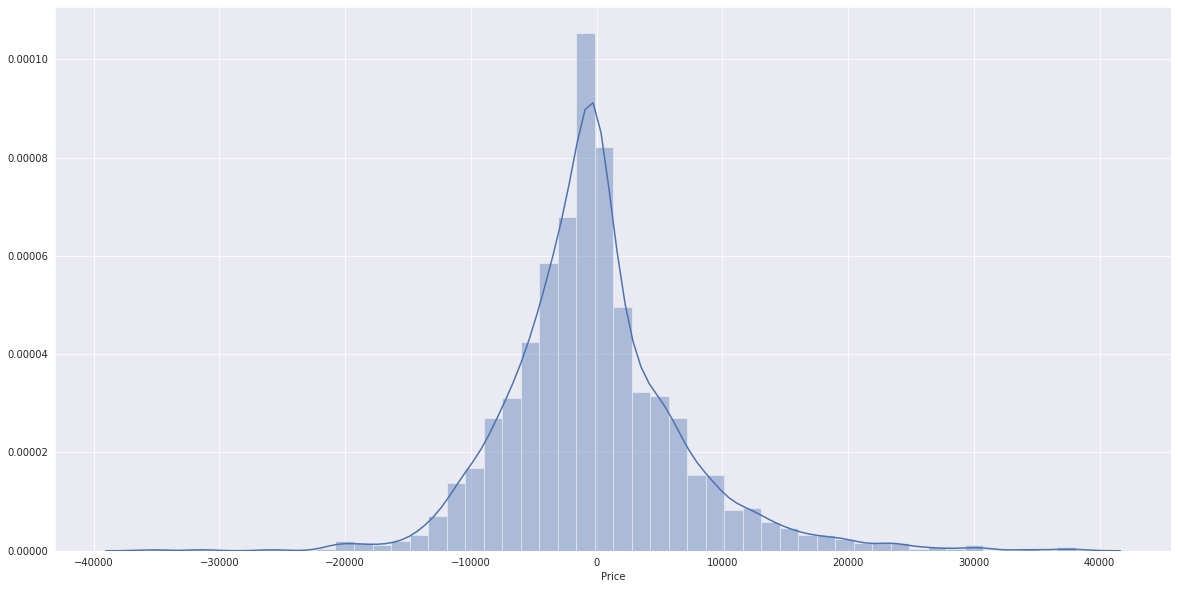

In [ ]:
sns.distplot((y_test-y_pred1), bins=50)

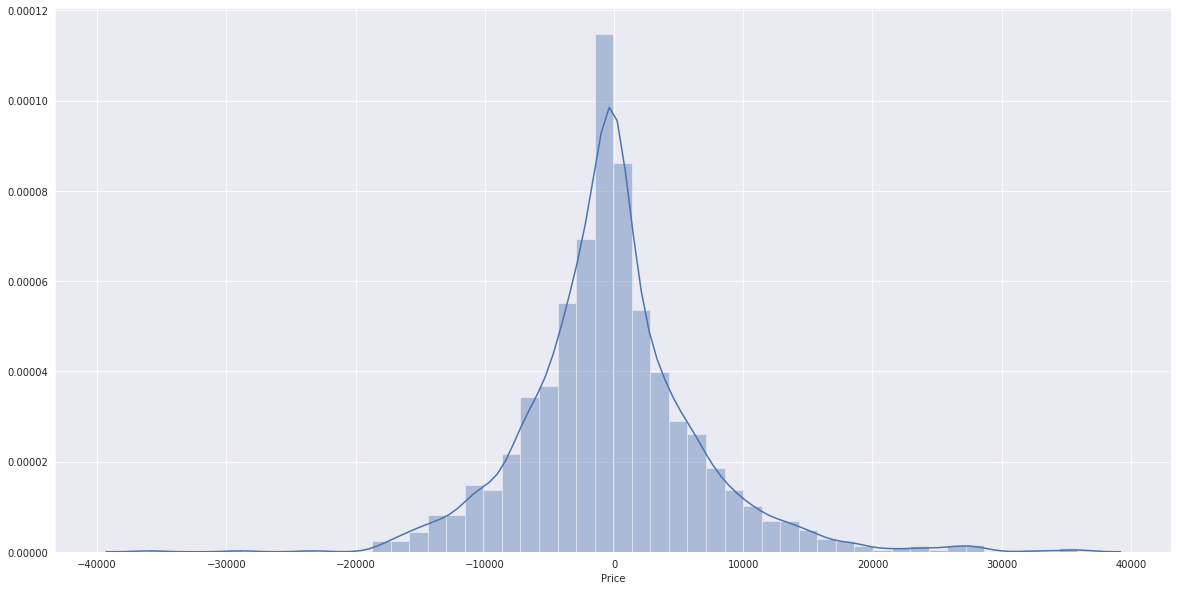

In [ ]:
sns.distplot((y_test-y_pred2), bins=50)

**Random Forest**

In [ ]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# predicting a new value 

# test the output by changing values
y_pred = regressor.predict(X_test)
# print the predicted price 
print('Value for regressor predict=',y_pred) 
print('mean_squared_error regressor predict =',mean_squared_error(y_test,y_pred))
print('r2_score regressor predict =',r2_score(y_test,y_pred))
print('mean_squared_error regressor predict =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Value for regressor predict= [18628.32333333 13936.3139881  25710.58666667 ... 30223.2
 19902.78833333 35347.7       ]
mean_squared_error regressor predict = 15732522.669493275
r2_score regressor predict = 0.9295712009702823
mean_squared_error regressor predict = 3966.4244187294526


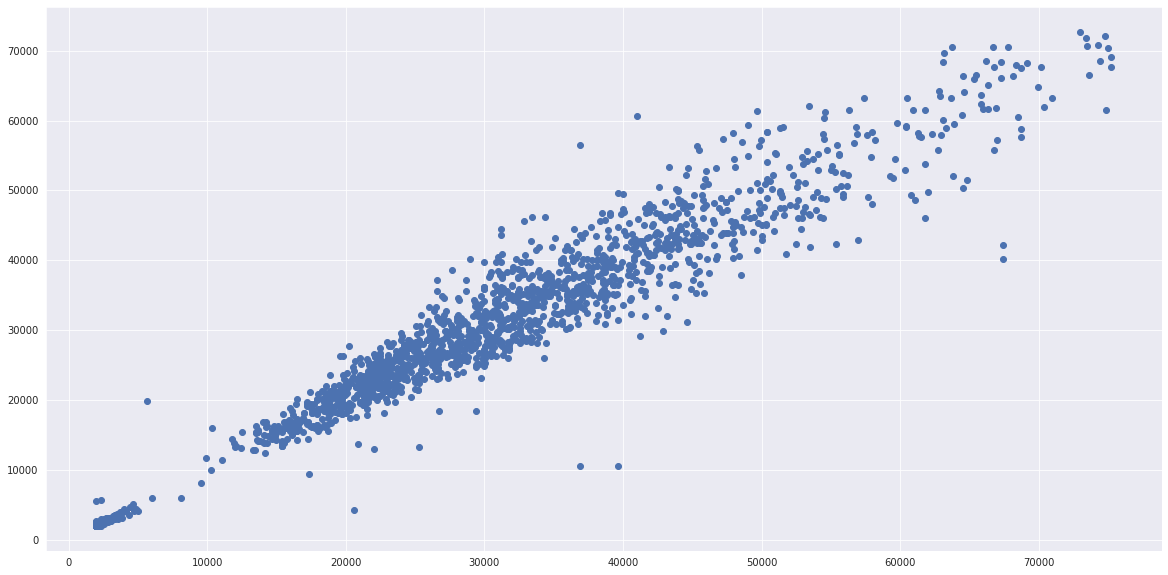

In [ ]:
plt.scatter(y_test, y_pred)

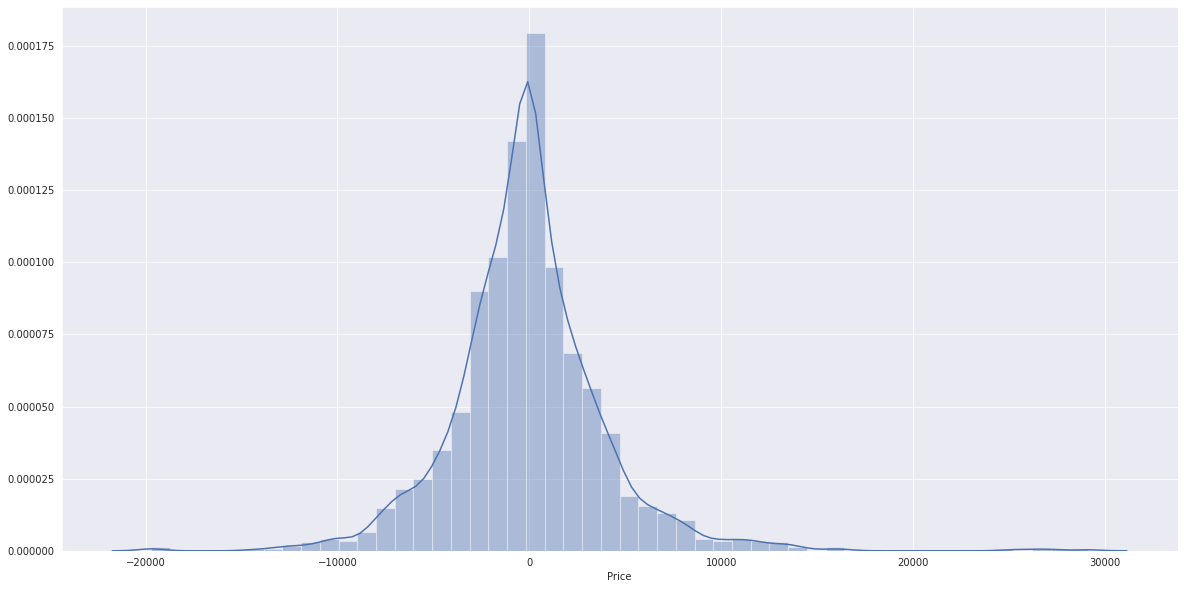

In [ ]:
sns.distplot((y_test-y_pred), bins=50)